# Lektion 5 - Scikit-learn API (Del 2)

**Assignment: Unsupervised learning with K-Means and PCA**

Instructions:
1. Work with a numeric dataset
2. Visualize results
3. Add short comments to explain your plots

## Task 1: K-Means clustering
Cluster a numeric dataset and choose k using the elbow method.

In [9]:
# TODO: Load a numeric dataset (iris features or another)
from sklearn.datasets import load_iris
import pandas as pd

# Att läsa in data är oftast ungefär såhär enkelt
# Det ser ofta ut som: data = pd.read_csv("filnamn.csv")

data = load_iris(as_frame=True)

# Det är inte säkert att ens indata är en snygg dictionary 
# uppdelad med data och target, MEN: oavsett hur datan är
# strukturerad så vill vi få ett X och ett y.   
X = data.data
# För unsupervised learning, så kan det vara så
# att vi inte ens har något y.
# Uppgiften kan vara att hitta indelningar.
y = data.target

## Extra EDA-steg, vi plottar datan

Ett vanligt fel: Vi gör EDA utanför notebooken, på nätet, eller googlar runt. När vi sedan kommer tillbaka till notebooken så har vi glömt bort vad vi gjorde, och varför. Det är därför viktigt att göra EDA i notebooken. 

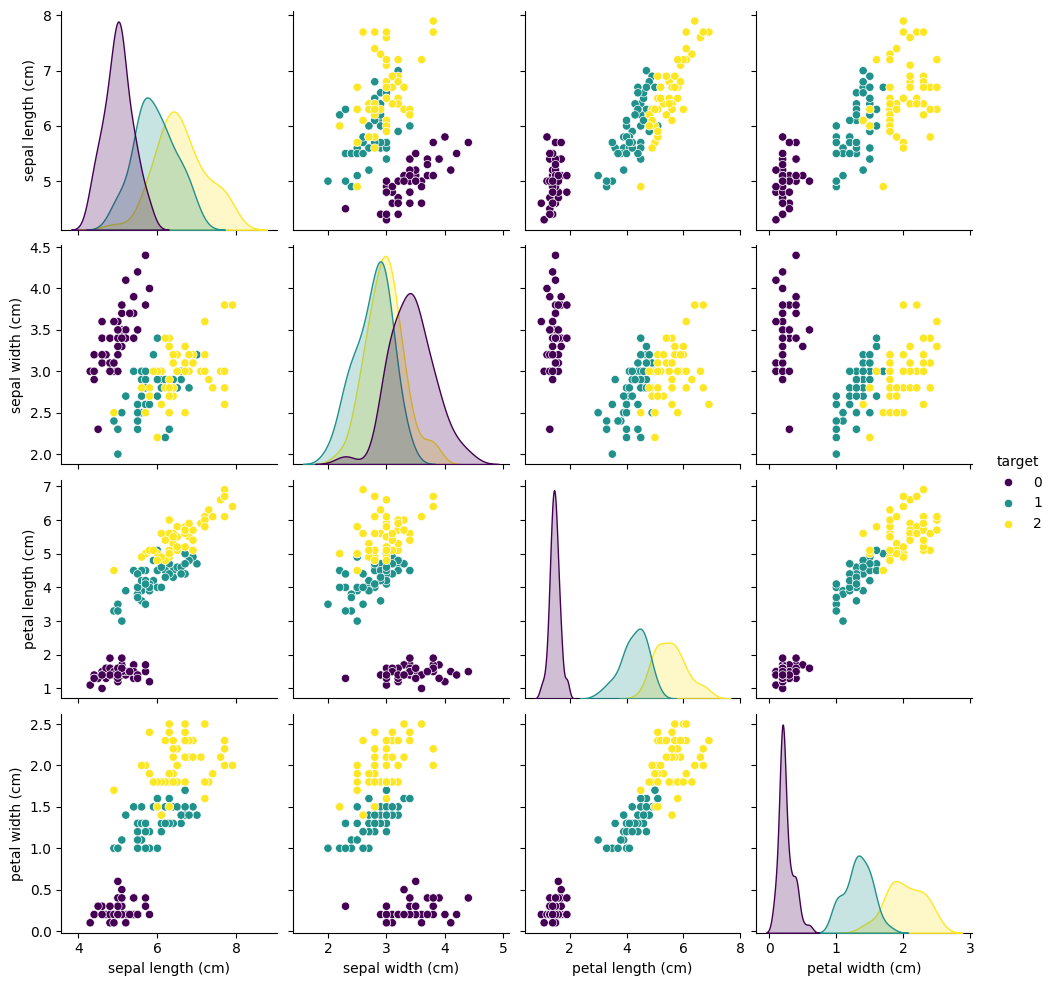

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn pairplot exempel
# Seaborn är ett bra komplement till matplotlib.
# Ett väldigt vanligt användningsområde är pairplot
# Pairplot plottar högdimensionell data, nedbryten i 
# par av 2-dimensioner, SAMT distribution av
# alla variabler (histogram)

sns.pairplot(data=data.frame, hue="target", vars=data.feature_names, palette="viridis")
plt.show()

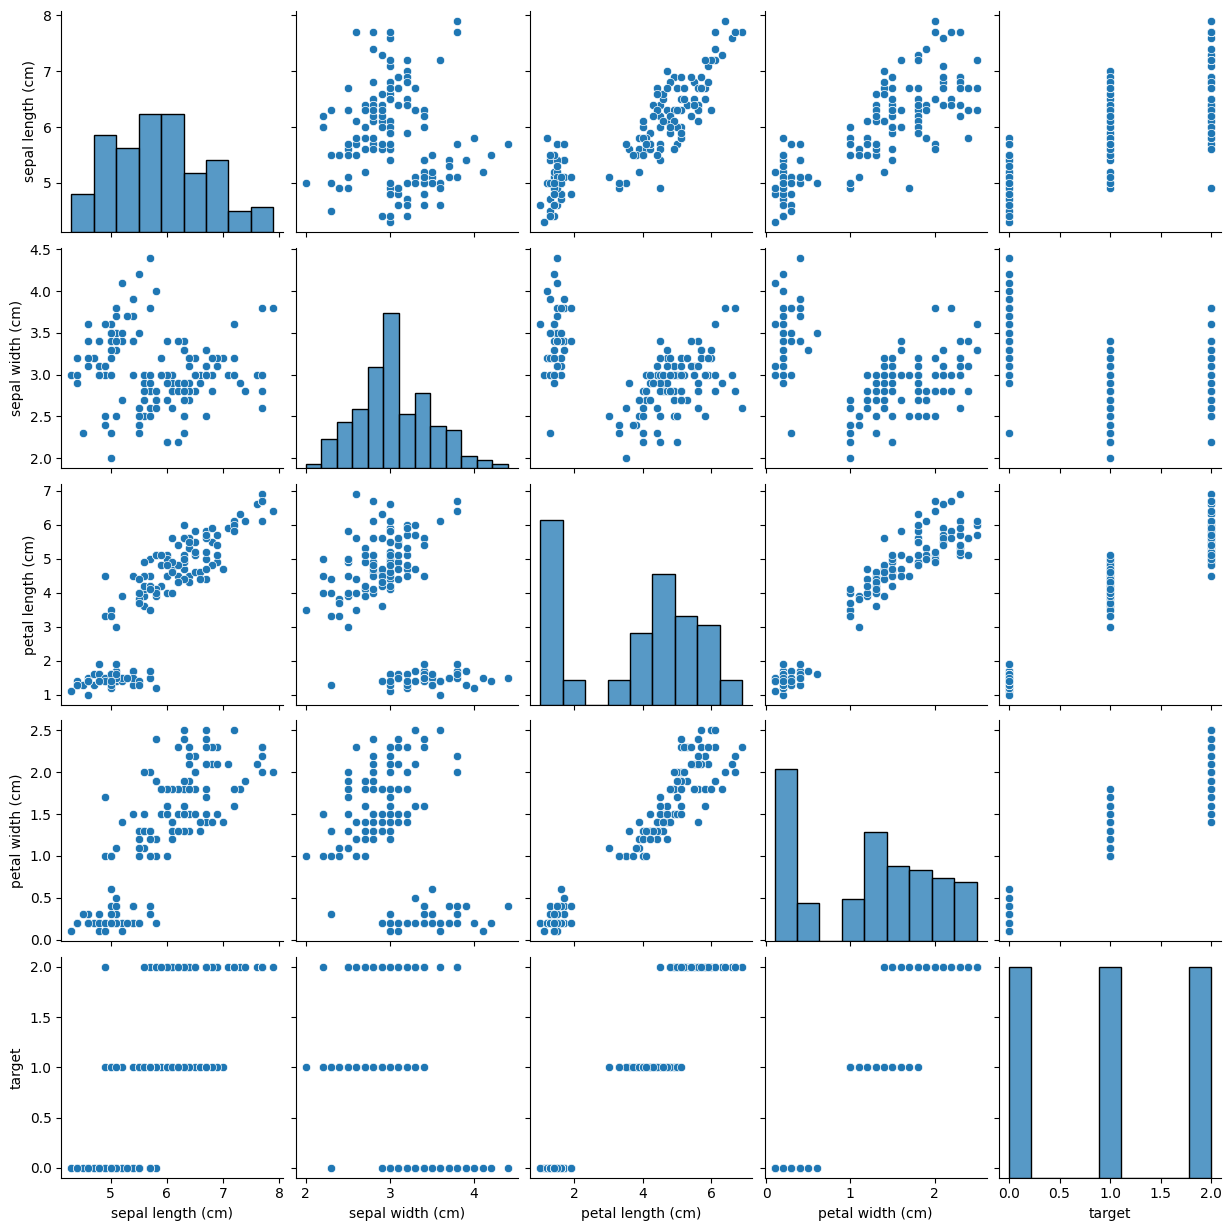

In [12]:
sns.pairplot(data.frame)

In [13]:
# TODO: Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [16]:
X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
X_scaled[:,1].std()

np.float64(1.0000000000000004)

In [14]:
print("X innan scaling:", X)
print("X efter scaling:", X_scaled)

X innan scaling:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
X efter scaling: [[-9.0

In [25]:
# TODO: Try k = 1..8 and compute inertia
from sklearn.cluster import KMeans

# Try k = 1..8 and compute inertia (elbow)
# Intertia: hur lika klustrena är inombords

# I loopen nedan så tränar vi KMeans-modeller med flera olika K
# för att utvärdera vilket som ger bäst resultat
# ALLTSÅ: Hur många kluster vi rimligtvis har i vår data
ks = range(1, 9)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)


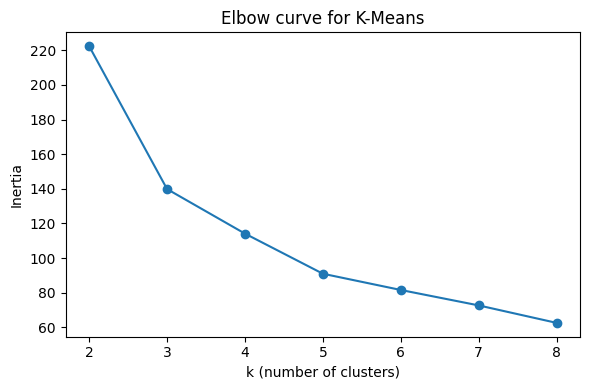

In [24]:
# TODO: Plot the elbow curve and choose k

# I plotten ser det lite ut som att vi har en elbow vid k=2?
# Men kanske även en liten vid k=3?

# För vår data är det här rimligt, med våra ögon ser det 
# ut som att datan kanske skulle kunna vara 2 kluster, och kanske 3.
# I praktiken kanske vi testar att klustra bägge

plt.figure(figsize=(6, 4))
plt.plot(list(ks), inertias, marker="o")
plt.title("Elbow curve for K-Means")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

In [26]:
# Vi såg i elbowplotten att k=3 nog var bäst! 

# Choose k=3 (reasonable for Iris) and fit
k_best = 3
kmeans = KMeans(n_clusters=k_best, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_scaled)


## Task 2: PCA visualization
Project to 2D and visualize structure.

In [ ]:
# TODO: Apply PCA with n_components=2
from sklearn.decomposition import PCA

# PCA handlar om att reducera högdimensionell data till lägre dimensioner
# Den är ganska bra på att behålla relationer. 
# Vi sätter en parameter n_components, som är hur många dimensioner vi vill ha, typiskt 2
pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_scaled)

In [ ]:
# TODO: Plot the 2D projection

In [ ]:
# TODO: Color by true labels (if available) or by cluster labels

## Task 3: Interpretation
Add short comments about what the clusters look like.

In [ ]:
# TODO: Write 4-6 comment lines about what the clusters look like

In [ ]:
print("Done! You explored unsupervised learning in code.")